### Yale B Classifier

##### Import Libraries

In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

##### Constants

In [2]:
FIRST_CLASS_LABEL = 0
SECOND_CLASS_LABEL = 1

##### Load Train Dateset

In [3]:
train_first_class_dir = "Data/Train/1st"
train_second_class_dir = "Data/Train/2nd"

train_first_class_list = os.listdir( train_first_class_dir)
train_second_class_list = os.listdir( train_second_class_dir)

train_X = []
train_y = []

for i in train_first_class_list:
    img = Image.open( f"{ train_first_class_dir}/{ i}")
    train_X.append( img)
    train_y.append( FIRST_CLASS_LABEL)

for i in train_second_class_list:
    img = Image.open( f"{ train_second_class_dir}/{ i}")
    train_X.append( img)
    train_y.append( SECOND_CLASS_LABEL)

train_X = np.array( train_X)
train_y = np.array( train_y)

print( f"Shape of Train Set Input: { train_X.shape}")
print( f"Shape of Train Set Labels: { train_y.shape}")

Shape of Train Set Input: (106, 160, 160)
Shape of Train Set Labels: (106,)


##### Normalize Train Data

In [4]:
train_X = train_X / 255.0

##### Showing Random Samples of Training Set

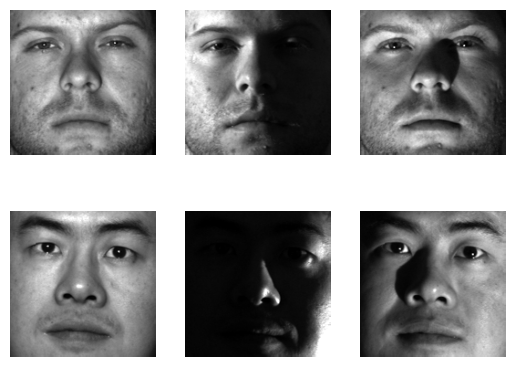

In [5]:
first = list( np.random.randint( 0, int( len( train_X) / 2), 3))
second = list( np.random.randint( int( len( train_X) / 2), int( len( train_X)), 3))
samples = np.array( [ first, second])

fig, axs = plt.subplots( 2, 3)

for i in range( 2):
    for j in range( 3):
        ax = axs[ i][ j]
        ax.imshow( train_X[ samples[ i][ j]], cmap="gray")
        ax.axis( False)

plt.show()

##### Load Test Dateset

In [6]:
test_first_class_dir = "Data/Test/1st"
test_second_class_dir = "Data/Test/2nd"

test_first_class_list = os.listdir( test_first_class_dir)
test_second_class_list = os.listdir( test_second_class_dir)

test_X = []
test_y = []

for i in test_first_class_list:
    img = Image.open( f"{ test_first_class_dir}/{ i}")
    test_X.append( img)
    test_y.append( FIRST_CLASS_LABEL)

for i in test_second_class_list:
    img = Image.open( f"{ test_second_class_dir}/{ i}")
    test_X.append( img)
    test_y.append( SECOND_CLASS_LABEL)

test_X = np.array( test_X)
test_y = np.array( test_y)

print( f"Shape of Test Set Input: { test_X.shape}")
print( f"Shape of Test Set Labels: { test_y.shape}")

Shape of Test Set Input: (24, 160, 160)
Shape of Test Set Labels: (24,)


##### Normalize Test Data

In [7]:
test_X = test_X / 255.0

##### Showing Random Samples of Test Set

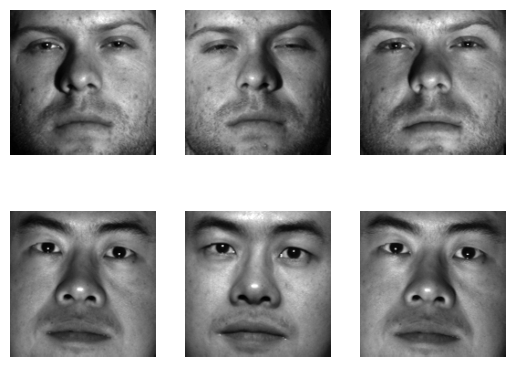

In [8]:
first = list( np.random.randint( 0, int( len( test_X) / 2), 3))
second = list( np.random.randint( int( len( test_X) / 2), int( len( test_X)), 3))
samples = np.array( [ first, second])

fig, axs = plt.subplots( 2, 3)

for i in range( 2):
    for j in range( 3):
        ax = axs[ i][ j]
        ax.imshow( test_X[ samples[ i][ j]], cmap="gray")
        ax.axis( False)

plt.show()

##### Augmentation Layers

In [9]:
data_augmentation = tf.keras.Sequential( [
    tf.keras.layers.RandomBrightness( 0.4, value_range=[ 0.0, 1.0], input_shape=( 160, 160, 1)),
    tf.keras.layers.RandomContrast( 0.2),
    tf.keras.layers.RandomFlip()
])

##### Test Augmentation Layers

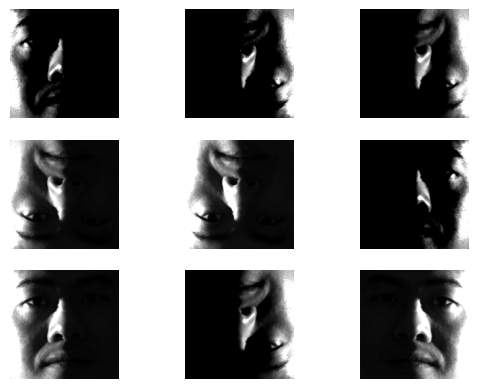

In [10]:
sample = np.random.randint( len( train_X))
image = train_X[ sample]

fig, axs = plt.subplots( 3, 3)

for i in range( 9):
    augmented_image = data_augmentation( image[ np.newaxis, :, :])
    ax = axs[ i // 3][ i % 3]
    ax.imshow( augmented_image[ 0, :, :, 0], cmap="gray")
    ax.axis( False)

plt.show()

##### Build The Model

In [11]:
model = tf.keras.models.Sequential( [
    data_augmentation,
    tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=( 3, 3),
        strides=( 1, 1),
        kernel_regularizer=tf.keras.regularizers.L2( l2=0.001)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(
        pool_size=( 4, 4),
        strides=( 4, 4)
    ),
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=( 3, 3),
        strides=( 1, 1),
        kernel_regularizer=tf.keras.regularizers.L2( l2=0.001)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D(
        pool_size=( 2, 2),
        strides=( 2, 2)
    ),
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=( 3, 3),
        strides=( 1, 1),
        kernel_regularizer=tf.keras.regularizers.L2( l2=0.001)
    ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.AveragePooling2D(
        pool_size=( 2, 2),
        strides=( 2, 2)
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units=256,
        activation="relu",
        kernel_regularizer=tf.keras.regularizers.L2( l2=0.001)
    ),
    tf.keras.layers.Dense(
        units=148,
        activation="relu",
        kernel_regularizer=tf.keras.regularizers.L2( l2=0.001)
    ),
    tf.keras.layers.Dense(
        units=1,
        activation="sigmoid"
    )
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=[ "accuracy"]
)

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 160, 160, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 158, 158, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 158, 158, 16)      64        
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 158, 158, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 39, 39, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 32)     

##### Train The Model

In [12]:
history = model.fit(
    train_X,
    train_y,
    epochs=100,
    batch_size=8
)

Epoch 1/100


14/14 [==============================] - 4s 38ms/step - loss: 1.5947 - accuracy: 0.5566
Epoch 2/100
14/14 [==============================] - 0s 29ms/step - loss: 1.4433 - accuracy: 0.5566
Epoch 3/100
14/14 [==============================] - 0s 35ms/step - loss: 1.1330 - accuracy: 0.7453
Epoch 4/100
14/14 [==============================] - 1s 39ms/step - loss: 0.9460 - accuracy: 0.8396
Epoch 5/100
14/14 [==============================] - 0s 33ms/step - loss: 0.7776 - accuracy: 0.9057
Epoch 6/100
14/14 [==============================] - 1s 38ms/step - loss: 0.7186 - accuracy: 0.9245
Epoch 7/100
14/14 [==============================] - 0s 35ms/step - loss: 0.6245 - accuracy: 0.9434
Epoch 8/100
14/14 [==============================] - 0s 34ms/step - loss: 0.5739 - accuracy: 0.9811
Epoch 9/100
14/14 [==============================] - 0s 35ms/step - loss: 0.5349 - accuracy: 0.9811
Epoch 10/100
14/14 [==============================] - 1s 40ms/step - loss: 0.6429 - accuracy: 0.94

##### Plot Loss Curve

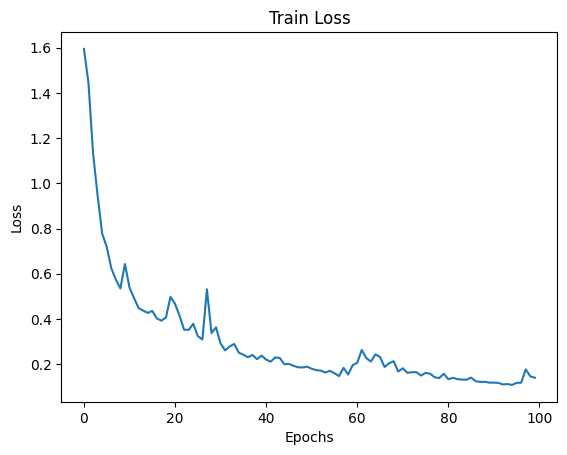

In [13]:
plt.figure()

plt.plot( history.history[ "loss"])
plt.title( "Train Loss")
plt.xlabel( "Epochs")
plt.ylabel( "Loss")

plt.show()

##### Training Set Accuracy and F1-Score

In [14]:
train_accuracy = tf.keras.metrics.BinaryAccuracy( threshold=0.5)
train_f1_score = tf.keras.metrics.F1Score( threshold=0.5)

y_pred_train = model.predict( train_X)

train_accuracy.update_state( train_y, y_pred_train)
train_f1_score.update_state( train_y[ :, np.newaxis], y_pred_train)

print( f"Accuracy on Training Set: { train_accuracy.result().numpy()}")
print( f"F1-Score on Training Set: { train_f1_score.result().numpy()}")

4/4 [==============================] - 0s 24ms/step
Accuracy on Training Set: 0.9905660152435303
F1-Score on Training Set: [0.9906542]


##### Test Set Accuracy and F1-Score

In [15]:
test_accuracy = tf.keras.metrics.BinaryAccuracy( threshold=0.5)
test_f1_score = tf.keras.metrics.F1Score( threshold=0.5)

y_pred_test = model.predict( test_X)

test_accuracy.update_state( test_y, y_pred_test)
test_f1_score.update_state( test_y[ :, np.newaxis], y_pred_test)

print( f"Accuracy on Test Set: { test_accuracy.result().numpy()}")
print( f"F1-Score on Test Set: { test_f1_score.result().numpy()}")

1/1 [==============================] - 0s 60ms/step
Accuracy on Test Set: 1.0
F1-Score on Test Set: [1.]
